In [53]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gene_id_to_name import load_dict, save_dict
from common_io import load_dataFrame
from visualization import tsne_df
%matplotlib inline 

In [39]:
# root_path = 'results_cima'
root_path = 'top50_TF/'
num_cells = 500
k_cluster = 3
simi = False
# file_name = 'magic_data_{}_cells_{}_similarity_10_target'.format(num_cells, simi)
file_name = 'magic_data_{}_cells_{}_similarity'.format(num_cells, simi)
p2f = os.path.join(root_path, file_name)

In [40]:
df_file_name = 'magic_smoothed_all_genes_{}_cells_per_cluster'.format(num_cells)
p2df_file = os.path.join('/data/jianhao/clus_GRN/', df_file_name)
df = pd.read_pickle(p2df_file)

In [41]:
p2mapping = os.path.join('/home/jianhao2/clus_GRN/data', 'merged_gene_id_to_name_pickle')
gene_id_name_mapping = load_dict(p2mapping)

loading pickle dictionary from file...
Done loading!


In [42]:
d500 = load_dict(p2f)
print(d500.keys())

loading pickle dictionary from file...
Done loading!
dict_keys(['weight_dic', 'TF_ids', 'query_targets'])


In [43]:
print(len(d500['TF_ids']))
print(len(d500['query_targets']))

50
10


In [44]:
print(d500['TF_ids'])

['ID3', 'YBX1', 'JUN', 'ARID4B', 'ID2', 'REL', 'ARID5A', 'SP110', 'SP100', 'LRRFIP1', 'BBX', 'LYAR', 'KLF3', 'HOPX', 'REST', 'IRF1', 'ATF6B', 'HMGA1', 'CDC5L', 'ZNF655', 'TSC22D4', 'CNOT4', 'ATRX', 'TSC22D3', 'MYC', 'KLF6', 'GATA3', 'ZNF22', 'ARID5B', 'ETS1', 'GTF3A', 'NFKBIA', 'MAX', 'FOS', 'BATF', 'FOXN3', 'YY1', 'RORA', 'IRF8', 'TCF25', 'NCOR1', 'SMARCE1', 'HOXB2', 'DNMT1', 'JUNB', 'LYL1', 'KLF2', 'IRF3', 'ZNF581', 'XBP1']


In [45]:
from common_io import split_df_and_assignment
df_train, df_test, _, _ = split_df_and_assignment(df, df['label'].values)
print(df_train.shape)

(1200, 32738)


In [46]:
total_id_set = set(gene_id_name_mapping.keys())
df_col_set = set(df.columns.values.tolist()[:-1])

In [47]:
print(len(total_id_set))
len(total_id_set.union(df_col_set))

35200


35200

In [48]:
gene_name_id_mapping = {val:key for key, val in gene_id_name_mapping.items()}
# print(gene_name_id_mapping)

In [49]:
gene_id_name_mapping[gene_name_id_mapping['C1orf159']]

'C1orf159'

---

In [50]:
target_name = d500['query_targets']
TF_name = d500['TF_ids']
print(target_name)
target_ids = [gene_name_id_mapping[n] for n in target_name]
for tid in target_ids:
    print(tid)

['RPS18', 'RPS6', 'RPS27', 'TMSB4X', 'MALAT1', 'RPS2', 'RPL13', 'B2M', 'RPL10', 'RPL13A']
ENSG00000231500
ENSG00000137154
ENSG00000177954
ENSG00000205542
ENSG00000251562
ENSG00000140988
ENSG00000167526
ENSG00000166710
ENSG00000147403
ENSG00000142541


In [14]:
print(TF_name)

['ID3', 'YBX1', 'JUN', 'ARID4B', 'ID2', 'REL', 'ARID5A', 'SP110', 'SP100', 'LRRFIP1', 'BBX', 'LYAR', 'KLF3', 'HOPX', 'REST', 'IRF1', 'ATF6B', 'HMGA1', 'CDC5L', 'ZNF655', 'TSC22D4', 'CNOT4', 'ATRX', 'TSC22D3', 'MYC', 'KLF6', 'GATA3', 'ZNF22', 'ARID5B', 'ETS1', 'GTF3A', 'NFKBIA', 'MAX', 'FOS', 'BATF', 'FOXN3', 'YY1', 'RORA', 'IRF8', 'TCF25', 'NCOR1', 'SMARCE1', 'HOXB2', 'DNMT1', 'JUNB', 'LYL1', 'KLF2', 'IRF3', 'ZNF581', 'XBP1']


In [15]:
print(target_ids)

['ENSG00000231500', 'ENSG00000137154', 'ENSG00000177954', 'ENSG00000205542', 'ENSG00000147403', 'ENSG00000140988', 'ENSG00000251562', 'ENSG00000166710', 'ENSG00000167526', 'ENSG00000142541']


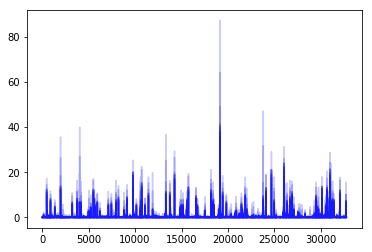

<Figure size 432x288 with 0 Axes>

In [16]:
rnd_sample_idx = np.random.permutation(1000)[:10]
for sample_idx in rnd_sample_idx:
    plt.plot(df.values[sample_idx, :-1], alpha = 0.2, c = 'b')
plt.show()
plt.clf()

In [17]:
# print(TF_name[:10])
# df[gene_name_id_mapping['BATF']]
df[target_ids][:10]

,ENSG00000231500,ENSG00000137154,ENSG00000177954,ENSG00000205542,ENSG00000147403,ENSG00000140988,ENSG00000251562,ENSG00000166710,ENSG00000167526,ENSG00000142541
0,11.400044,10.360371,11.079684,9.373899,14.678715,16.221049,33.465358,7.011095,19.529994,16.773582
1,14.062221,12.448415,12.918651,10.764053,17.564274,19.571568,38.016516,8.419684,22.702655,19.909831
2,32.699236,25.256321,23.291044,23.815817,35.975774,39.475313,57.339088,24.205208,41.574821,37.282406
3,13.734967,12.226025,12.673528,10.563488,17.117403,19.113424,38.379658,8.299840,22.245561,19.441462
4,15.929536,13.833201,14.201957,11.792289,19.640022,21.784213,41.485499,10.039379,24.541354,21.993124
5,20.290183,16.845164,17.077966,14.284449,24.262629,26.688003,47.404111,13.815219,28.788544,26.586015
6,12.400653,11.171959,11.762135,9.868923,15.706513,17.503591,35.271960,7.359756,20.834712,17.953855
7,19.447542,16.282560,16.562855,13.799348,23.417050,25.777681,46.467049,13.147753,27.963075,25.770414
8,9.644614,9.661282,9.794791,9.506606,13.565330,14.363592,31.981752,8.825845,17.089413,14.452367
9,16.738663,14.422916,14.792295,12.219473,20.514628,22.705026,43.316143,10.880739,25.247936,22.886393


In [18]:
weight_dict = d500['weight_dic']
w_cluster0 = weight_dict[0]
w_cluster1 = weight_dict[1]
w_cluster2 = weight_dict[2]
# print(df_train.shape)

In [51]:
weight_dict_no_smi = d500['weight_dic']

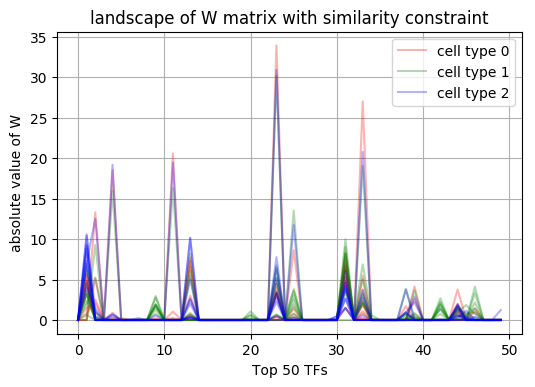

<Figure size 432x288 with 0 Axes>

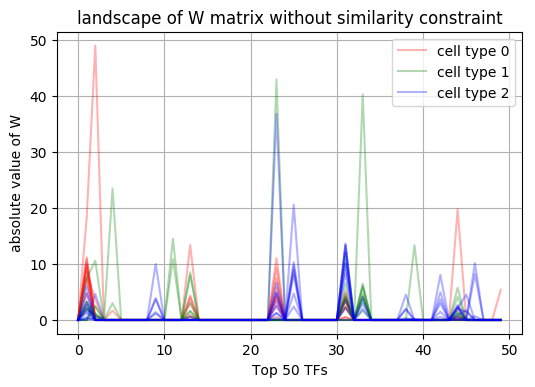

<Figure size 432x288 with 0 Axes>

In [54]:
color_list = ['r', 'g', 'b']
plt.figure(dpi = 100)
for cl in range(3):
    col = color_list[cl]
    for i in range(weight_dict[cl].shape[1]):
        if i  == 0:
            my_label = 'cell type {}'.format(cl)
        else:
            my_label = None
        plt.plot(abs(weight_dict[cl][:, i]), c = col, alpha = 0.3, label = my_label)

plt.grid()
plt.legend()
plt.xlabel('Top 50 TFs')
plt.ylabel('absolute value of W')
plt.title('landscape of W matrix with similarity constraint')
plt.show()
plt.clf()
# tf_idx = np.nonzero(tmp > .5)[0]
# print(tf_idx)
# print([TF_name[int(n)] for n in tf_idx])

color_list = ['r', 'g', 'b']
plt.figure(dpi = 100)
for cl in range(3):
    col = color_list[cl]
    for i in range(weight_dict_no_smi[cl].shape[1]):
        if i  == 0:
            my_label = 'cell type {}'.format(cl)
        else:
            my_label = None
        plt.plot(abs(weight_dict_no_smi[cl][:, i]), c = col, alpha = 0.3, label = my_label)
        
plt.grid()
plt.legend()
plt.xlabel('Top 50 TFs')
plt.ylabel('absolute value of W')
plt.title('landscape of W matrix without similarity constraint')
plt.show()
plt.clf()

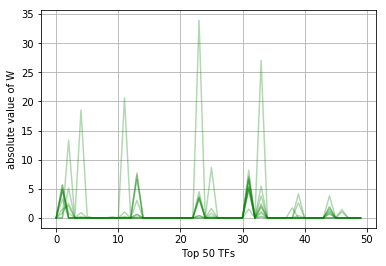

<Figure size 432x288 with 0 Axes>

In [23]:
for i in range(w_cluster0.shape[1]):
    plt.plot(abs(w_cluster0[:, i]), c = 'g', alpha = 0.3)
# plt.show()
# plt.clf()
# tmp = np.mean(abs(w_cluster0)> 1e-3, axis = 1)
# plt.plot(tmp)
plt.grid()
plt.xlabel('Top 50 TFs')
plt.ylabel('absolute value of W')
plt.show()
plt.clf()
# tf_idx = np.nonzero(tmp > .5)[0]
# print(tf_idx)
# print([TF_name[int(n)] for n in tf_idx])

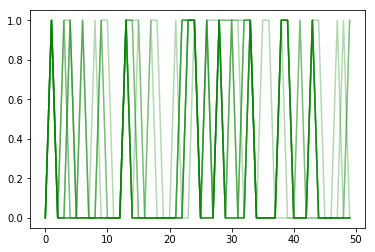

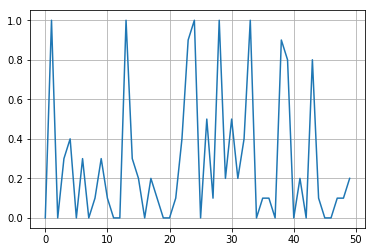

[ 1 13 23 24 28 33 38 39 43]
['YBX1', 'HOPX', 'TSC22D3', 'MYC', 'ARID5B', 'FOS', 'IRF8', 'TCF25', 'DNMT1']


<Figure size 432x288 with 0 Axes>

In [130]:
for i in range(w_cluster1.shape[1]):
    plt.plot(abs(w_cluster1[:, i])>1e-3, c = 'g', alpha = 0.3)
plt.show()
plt.clf()
tmp = np.mean(abs(w_cluster1)> 1e-3, axis = 1)
plt.plot(tmp)
plt.grid()
plt.show()
plt.clf()
tf_idx = np.nonzero(tmp > .5)[0]
print(tf_idx)
print([TF_name[int(n)] for n in tf_idx])

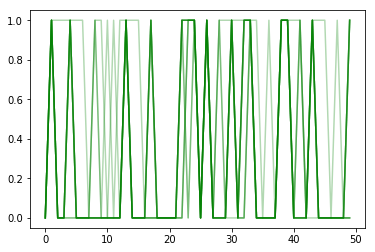

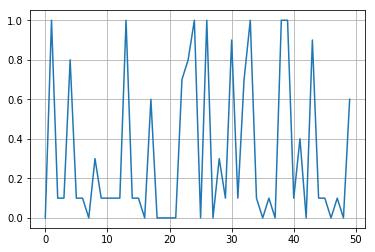

[ 1  4 13 17 22 23 24 26 30 32 33 38 39 43 49]
['YBX1', 'ID2', 'HOPX', 'HMGA1', 'ATRX', 'TSC22D3', 'MYC', 'GATA3', 'GTF3A', 'MAX', 'FOS', 'IRF8', 'TCF25', 'DNMT1', 'XBP1']


<Figure size 432x288 with 0 Axes>

In [131]:
for i in range(w_cluster2.shape[1]):
    plt.plot(abs(w_cluster2[:, i])>1e-3, c = 'g', alpha = 0.3)
plt.show()
plt.clf()
tmp = np.mean(abs(w_cluster2)> 1e-3, axis = 1)
plt.plot(tmp)
plt.grid()
plt.show()
plt.clf()
tf_idx = np.nonzero(tmp > .5)[0]
print(tf_idx)
print([TF_name[int(n)] for n in tf_idx])

----

In [62]:
sum_sparsity = 0
k = 0
for label in weight_dict:
    print('\tlabel = ', label)
    w_mat = weight_dict[label]
    for col_idx in range(w_mat.shape[1]):
        cur_col = w_mat[:, col_idx]
        num_non_zero = np.count_nonzero(cur_col > 1e-3)
        sparsity = num_non_zero / cur_col.size
        sum_sparsity += sparsity
        k += 1
        print('{}\t{}\t{}'.format(sparsity, num_non_zero, cur_col.size))
        print('-'*7)
ave_spar = sum_sparsity / k
print(ave_spar)

	label =  0
0.12	6	50
-------
0.06	3	50
-------
0.16	8	50
-------
0.14	7	50
-------
0.12	6	50
-------
0.18	9	50
-------
0.16	8	50
-------
0.08	4	50
-------
0.1	5	50
-------
0.08	4	50
-------
	label =  1
0.06	3	50
-------
0.12	6	50
-------
0.2	10	50
-------
0.16	8	50
-------
0.12	6	50
-------
0.14	7	50
-------
0.26	13	50
-------
0.14	7	50
-------
0.16	8	50
-------
0.14	7	50
-------
	label =  2
0.1	5	50
-------
0.12	6	50
-------
0.1	5	50
-------
0.1	5	50
-------
0.1	5	50
-------
0.16	8	50
-------
0.18	9	50
-------
0.14	7	50
-------
0.18	9	50
-------
0.1	5	50
-------
0.13266666666666674


In [28]:
total_mat = df_train[list(df_col_set)].values
total_spar = np.count_nonzero(total_mat) / (total_mat.shape[0] * total_mat.shape[1])
print('total sparsity = {:.4f}'.format(1 - total_spar))
TF_ids = []
for tn in TF_name:
    TF_ids.append(gene_name_id_mapping[tn])
TF_mat = df_train[TF_ids].values
TF_spar = np.count_nonzero(TF_mat)/(TF_mat.shape[0] * TF_mat.shape[1])
print('TF matrix sparsity = {:.4f}'.format(1 - TF_spar))

total sparsity = 0.5790
TF matrix sparsity = 0.0000


In [29]:
print([gene_id_name_mapping[n] for n in TF_ids])
print(d500['TF_ids'])
[gene_id_name_mapping[n] for n in TF_ids] == d500['TF_ids']

['ID3', 'YBX1', 'JUN', 'ARID4B', 'ID2', 'REL', 'ARID5A', 'SP110', 'SP100', 'LRRFIP1', 'BBX', 'LYAR', 'KLF3', 'HOPX', 'REST', 'IRF1', 'ATF6B', 'HMGA1', 'CDC5L', 'ZNF655', 'TSC22D4', 'CNOT4', 'ATRX', 'TSC22D3', 'MYC', 'KLF6', 'GATA3', 'ZNF22', 'ARID5B', 'ETS1', 'GTF3A', 'NFKBIA', 'MAX', 'FOS', 'BATF', 'FOXN3', 'YY1', 'RORA', 'IRF8', 'TCF25', 'NCOR1', 'SMARCE1', 'HOXB2', 'DNMT1', 'JUNB', 'LYL1', 'KLF2', 'IRF3', 'ZNF581', 'XBP1']
['ID3', 'YBX1', 'JUN', 'ARID4B', 'ID2', 'REL', 'ARID5A', 'SP110', 'SP100', 'LRRFIP1', 'BBX', 'LYAR', 'KLF3', 'HOPX', 'REST', 'IRF1', 'ATF6B', 'HMGA1', 'CDC5L', 'ZNF655', 'TSC22D4', 'CNOT4', 'ATRX', 'TSC22D3', 'MYC', 'KLF6', 'GATA3', 'ZNF22', 'ARID5B', 'ETS1', 'GTF3A', 'NFKBIA', 'MAX', 'FOS', 'BATF', 'FOXN3', 'YY1', 'RORA', 'IRF8', 'TCF25', 'NCOR1', 'SMARCE1', 'HOXB2', 'DNMT1', 'JUNB', 'LYL1', 'KLF2', 'IRF3', 'ZNF581', 'XBP1']


True

---

In [ ]:
from evaluation_metric import Median_Abs_Deviation, get_top_k_idx_from_list

In [ ]:
# takes a while, sorting evary column twice
mad_list = []
for col_idx in range(total_mat.shape[1]):
    tmp = Median_Abs_Deviation(total_mat[:, col_idx])
    mad_list.append(tmp)

In [ ]:
print(len(mad_list))
print(np.count_nonzero(mad_list))
print(1 - np.count_nonzero(mad_list)/len(mad_list))

In [ ]:
# takes a while, sorting evary column twice
mad_list_TF = []
for col_idx in range(TF_mat.shape[1]):
    tmp = Median_Abs_Deviation(TF_mat[:, col_idx])
    mad_list_TF.append(tmp)


In [ ]:
print(len(mad_list_TF))
print(np.count_nonzero(mad_list_TF))
print(1 - np.count_nonzero(mad_list_TF)/len(mad_list_TF))

In [ ]:
# Mean, variance, sparsity, MAD of TF_mat
mean_tf = np.mean(TF_mat, axis = 0)
var_tf = np.var(TF_mat, axis = 0)
spar = lambda x: 1 - np.count_nonzero(x)/len(x)
spar_list_tf = np.array([spar(col) for col in TF_mat.T])

print(spar_list_tf)
print(sum(spar_list_tf))
print(np.count_nonzero(spar_list_tf))
spar([0, 1, 0, 1])

In [ ]:
fig = plt.figure(dpi = 120)
ax0 = fig.add_subplot(2, 2, 1)
ax0.set_title('mean')
ax0.grid()
ax0.plot(mean_tf)

ax1 = fig.add_subplot(2, 2, 2)
ax1.set_title('var')
ax1.grid()
ax1.plot(var_tf)

ax2 = fig.add_subplot(2, 2, 3)
ax2.set_title('zero percentage')
ax2.grid()
ax2.plot(spar_list_tf)

ax3 = fig.add_subplot(2, 2, 4)
ax3.set_title('MAD')
ax3.grid()
ax3.plot(mad_list_TF)
plt.tight_layout()
plt.show()

In [ ]:
top_k = 50
TF_idx = get_top_k_idx_from_list(mad_list_TF, top_k)
print('mean of MAD in top {} = {:.4f}'.format(top_k, np.mean(np.array(mad_list_TF)[TF_idx])))
top_k_TF_ids = [TF_ids[idx] for idx in TF_idx]
mean_of_top_k_mad_tf = np.zeros_like(mean_tf)
mean_of_top_k_mad_tf[TF_idx] = mean_tf[TF_idx]

var_of_top_k_mad_tf = np.zeros_like(var_tf)
var_of_top_k_mad_tf[TF_idx] = var_tf[TF_idx]

spar_of_top_k_mad_tf = np.zeros_like(spar_list_tf)
spar_of_top_k_mad_tf[TF_idx] = spar_list_tf[TF_idx]

mad_of_top_k_mad_tf = np.zeros_like(mad_list_TF)
mad_of_top_k_mad_tf[TF_idx] = np.array(mad_list_TF)[TF_idx]

print(df_train[top_k_TF_ids].shape)
df_train[top_k_TF_ids][:10]

In [ ]:
file_name = 'top_{}_MAD_val_selected_TF_pickle'.format(top_k)
data_root = '/data/jianhao/clus_GRN/diff_gene_list/'
path_to_selected_TF_ids_file = os.path.join(data_root, file_name)
with open(path_to_selected_TF_ids_file, 'wb') as f:
    pickle.dump(top_k_TF_ids, f)

In [ ]:
fig = plt.figure(dpi = 120)
ax0 = fig.add_subplot(2, 2, 1)
ax0.set_title('mean')
ax0.grid()
ax0.plot(mean_of_top_k_mad_tf)

ax1 = fig.add_subplot(2, 2, 2)
ax1.set_title('var')
ax1.grid()
ax1.plot(var_of_top_k_mad_tf)

ax2 = fig.add_subplot(2, 2, 3)
ax2.set_title('zero percentage')
ax2.grid()
ax2.plot(spar_of_top_k_mad_tf)

ax3 = fig.add_subplot(2, 2, 4)
ax3.set_title('MAD')
ax3.grid()
ax3.plot(mad_of_top_k_mad_tf)
plt.tight_layout()
plt.show()

---

---
# request bed file from MyGene.info

In [ ]:
target_gene_str = ','.join(target_ids)
print(target_gene_str)

In [ ]:
import requests
headers = {'content-type': 'application/x-www-form-urlencoded'}
species = 'human'
scopes = 'ensembl.gene'
fields = 'symbbol,genomic_pos_hg19.chr, genomic_pos_hg19.start, genomic_pos_hg19.end'
params = 'q={}&species={}&scopes={}&fields={}'.format(target_gene_str,
                                                     species, scopes,
                                                     fields)
res = requests.post('http://mygene.info/v3/query', data=params, headers=headers)

In [ ]:
r_data = res.json()
r_data[0]

In [ ]:
gene_id_to_postion = {}
ch_set = set([str(i) for i in range(23)] + ['X', 'Y'])
# print(ch_set)
bed_str = ''
expand_bp = 20000
for query_item in r_data:
    gene_id = query_item['query']
    g_pos = query_item['genomic_pos_hg19']
    if isinstance(g_pos, list):
        for tmp in g_pos:
            if tmp['chr'] in ch_set:
                break
        g_pos = tmp
    assert isinstance(g_pos, dict)
    chX = g_pos['chr']
    start_pos = max(g_pos['start'] - expand_bp, 0)
    end_pos = g_pos['end'] + expand_bp
    pos_str = 'ch{}\t{}\t{}'.format(chX, start_pos, end_pos)
    gene_id_to_postion[gene_id] = pos_str
    bed_str += pos_str + '\n'

print(bed_str)
gene_id_to_postion